In [1]:
# 3. Decision Tree & Random Forest Implementation in python
# We will use Decision Tree & Random Forest in Predicting the attrition of your valuable employees.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


EDA

In [3]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


<Axes: xlabel='Attrition', ylabel='count'>

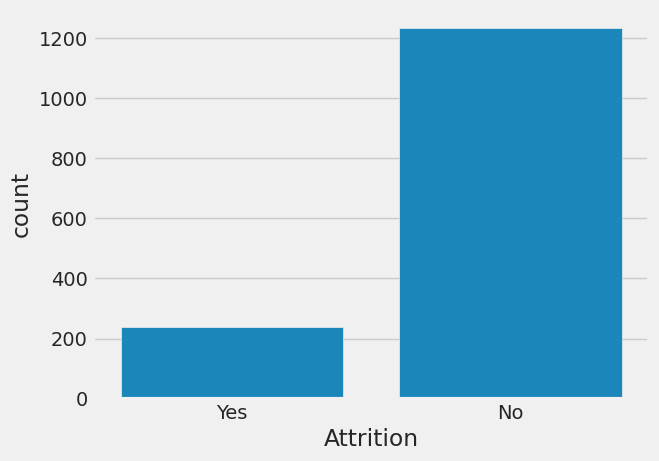

In [4]:
sns.countplot(x='Attrition',data=df)

In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],axis='columns',inplace=True)

categorical_col=[]

for column in df.columns:
  if df[column].dtype==object and len(df[column].unique())<=50:
    categorical_col.append(column)

df['Attrition']=df.Attrition.astype("category").cat.codes

Data Preprocessing

In [6]:
df.dtypes

,0
Age,int64
Attrition,int8
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EnvironmentSatisfaction,int64
Gender,object


In [7]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [8]:
categorical_col.remove('Attrition')

In [9]:
df['Attrition']

,Attrition
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [10]:
#Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder
lable=LabelEncoder()
for col in categorical_col:
  df[col]=lable.fit_transform(df[col])

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Applying Tree & Random Forest algorithms

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf,X_train,y_train,X_test,y_test,train=True):
  if train:
    pred=clf.predict(X_train)
    clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
    print("Train Result:\n================================================")
    print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")
  elif train==False:
    pred=clf.predict(X_test)
    clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
    print("Test Result:\n================================================")
    print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
    print("__________________________________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("________________________________________________________________")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")




Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score:100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix:
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score:77.78%
__________________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
____________________________________

Visualization of a tree

In [15]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

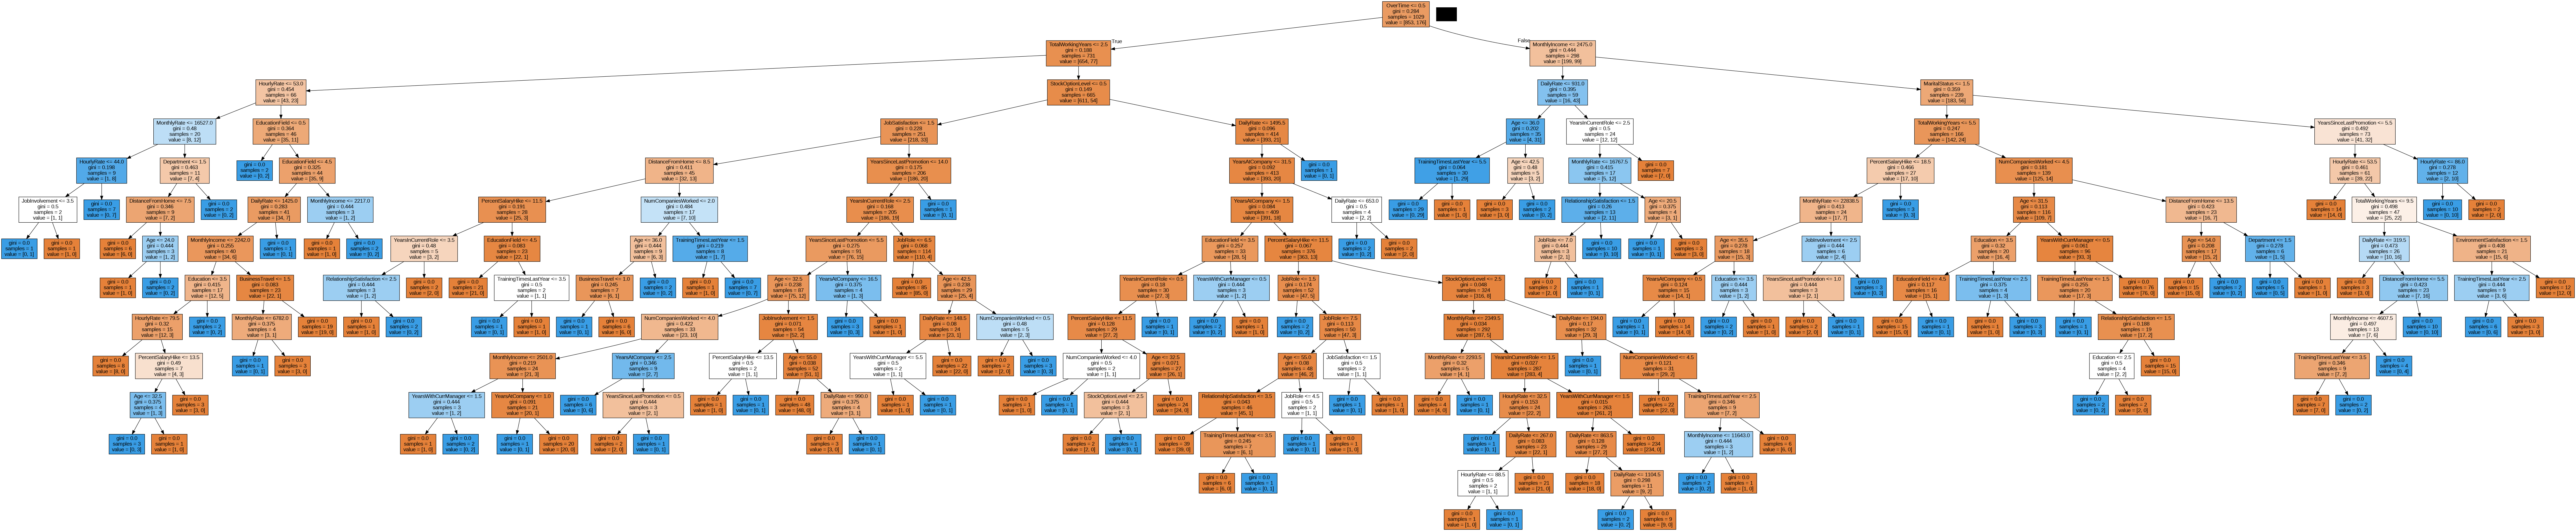

In [16]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

print_score(rf_clf,X_train,y_train,X_test,y_test,train=True)
print_score(rf_clf,X_train,y_train,X_test,y_test,train=False)

Train Result:
Accuracy Score:100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix:
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score:86.39%
__________________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.872093   0.545455  0.863946    0.708774      0.826912
recall       0.986842   0.098361  0.863946    0.542601      0.863946
f1-score     0.925926   0.166667  0.863946    0.546296      0.820904
support    380.000000  61.000000  0.863946  441.000000    441.000000
____________________________________